<a href="https://colab.research.google.com/github/dhruv-s1/Machinelearningmodels/blob/Unsupervised/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (if not already installed)
# !pip install numpy matplotlib pandas seaborn

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Load and read the dataset
dataset = pd.read_csv('Credit Card Customer Data.csv')

# Print the first five entries of the DataFrame
dataset.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# View the information of the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
# Check the number of rows and columns in the dataset
num_rows, num_cols = dataset.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)


Number of Rows: 660
Number of Columns: 7


In [ ]:

# Describe the dataset to get statistical summary
dataset.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
# Feature selection for hierarchical clustering
selected_features = dataset[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
selected_features

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


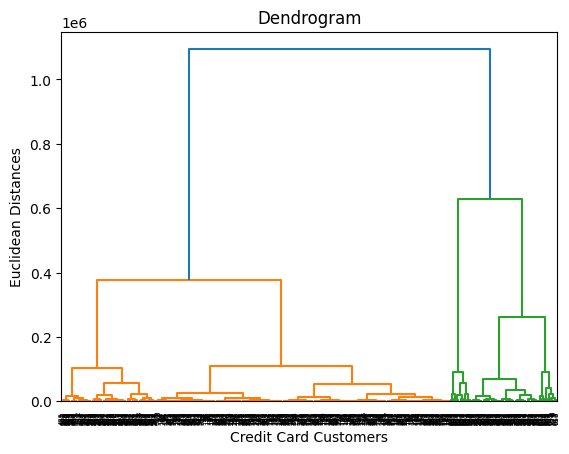

In [ ]:

import scipy.cluster.hierarchy as sch

# Create the dendrogram for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(selected_features, method='ward'))

# Add title and labels to the dendrogram plot
plt.title('Dendrogram')
plt.xlabel('Credit Card Customers')
plt.ylabel('Euclidean Distances')

# Display the dendrogram plot
plt.show()


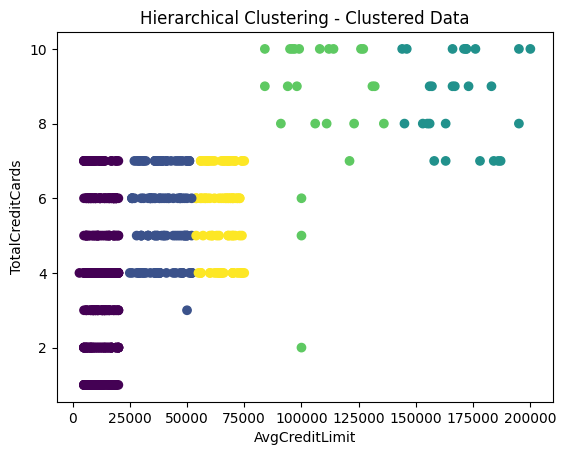

In [ ]:

# Importing the Agglomerative Clustering model from sklearn
from sklearn.cluster import AgglomerativeClustering

# Creating an object of class AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Training the Hierarchical Clustering model on the dataset
y_hc = hc.fit_predict(selected_features)

# Creating an object 'hc1' of class AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')

# Training the Hierarchical Clustering model on the dataset
y_hc1 = hc1.fit_predict(selected_features)
# Visualizing the clusters using y_hc
plt.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1], c=y_hc, cmap='viridis')
plt.title('Hierarchical Clustering - Clustered Data')
plt.xlabel('AvgCreditLimit')
plt.ylabel('TotalCreditCards')
plt.show()
